In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
# https://medium.com/analytics-vidhya/topological-data-analysis-w-scikit-tda-891a201665d8
# https://towardsdatascience.com/persistent-homology-with-examples-1974d4b9c3d0

In [19]:
data = pd.read_csv('./trading_data.csv')

In [20]:
data.head(50)

,Date,Sip,Russel,Djia,Nasdaq
0,1987-12-23,NaN,NaN,NaN,NaN
1,1987-12-24,-0.004474,0.006518,-0.002981,0.005115
2,1987-12-28,-0.025966,-0.021531,-0.028764,-0.023073
3,1987-12-29,-0.003999,-0.005900,-0.008310,-0.000307
4,1987-12-30,0.013281,0.010093,0.011973,0.012821
5,1987-12-31,-0.003152,0.007669,-0.005796,0.002423
6,1988-01-04,0.035231,0.025256,0.038659,0.023917
7,1988-01-05,0.010455,0.021072,0.008031,0.016408
8,1988-01-06,0.001005,0.006874,0.003096,0.007528
9,1988-01-07,0.008385,0.008078,0.006890,0.008616


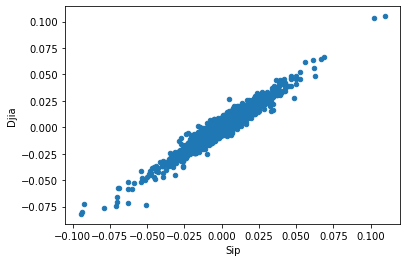

In [21]:
data.plot(kind='scatter', x='Sip', y='Djia')

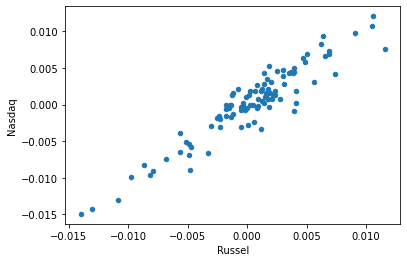

In [22]:
data.iloc[100:200, :].plot(kind='scatter', x='Russel', y='Nasdaq')

In [23]:
def get_sliding_window(data, size, ending_date='1988-03-04'):
    data = data.sort_values(by=['Date'], ascending=False)
    row_index = data[data['Date']==ending_date].index[0]
    return data.iloc[row_index:row_index+size, :]

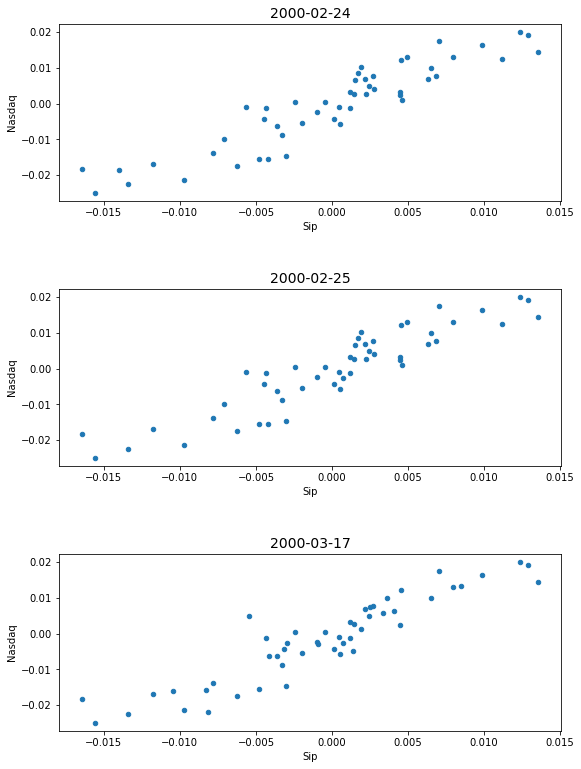

In [24]:
window_1 = get_sliding_window(data, 50, '2000-02-24')
window_2 = get_sliding_window(data, 50, '2000-02-25')
window_3 = get_sliding_window(data, 50, '2000-03-17')


fig, ((ax1, ax2, ax3)) = plt.subplots(3,1, figsize=(9,13))

window_1.plot(kind='scatter', x='Sip', y='Nasdaq', ax=ax1)
window_2.plot(kind='scatter', x='Sip', y='Nasdaq', ax=ax2)
window_3.plot(kind='scatter', x='Sip', y='Nasdaq', ax=ax3)

ax1.set_title('2000-02-24', size=14)
ax2.set_title('2000-02-25', size=14)
ax3.set_title('2000-03-17', size=14)


plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [25]:
fig.savefig('50d_example')

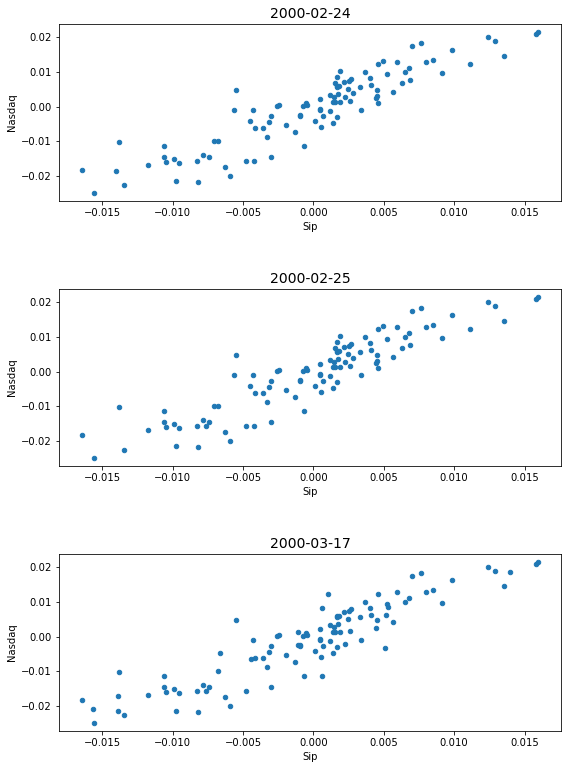

In [26]:
window_1 = get_sliding_window(data, 100, '2000-02-24')
window_2 = get_sliding_window(data, 100, '2000-02-25')
window_3 = get_sliding_window(data, 100, '2000-03-17')


fig, ((ax1, ax2, ax3)) = plt.subplots(3,1, figsize=(9,13))

window_1.plot(kind='scatter', x='Sip', y='Nasdaq', ax=ax1)
window_2.plot(kind='scatter', x='Sip', y='Nasdaq', ax=ax2)
window_3.plot(kind='scatter', x='Sip', y='Nasdaq', ax=ax3)

ax1.set_title('2000-02-24', size=14)
ax2.set_title('2000-02-25', size=14)
ax3.set_title('2000-03-17', size=14)


plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [27]:
fig.savefig('100d_example')

In [28]:
sliding_windows = [window_1, window_2, window_3]
window_1.head()


,Date,Sip,Russel,Djia,Nasdaq
4224,2004-09-22,-0.014036,-0.019304,-0.013339,-0.018635
4223,2004-09-21,0.006307,0.010770,0.003916,0.006847
4222,2004-09-20,-0.005643,-0.004249,-0.007767,-0.001058
4221,2004-09-17,0.004485,-0.002387,0.003894,0.003151
4220,2004-09-16,0.002790,0.010533,0.001282,0.003978


In [29]:
tmp = window_1.iloc[0:50, 1:].to_numpy()

In [32]:
acX = gd.AlphaComplex(points=tmp).create_simplex_tree()
dgmX = acX.persistence()

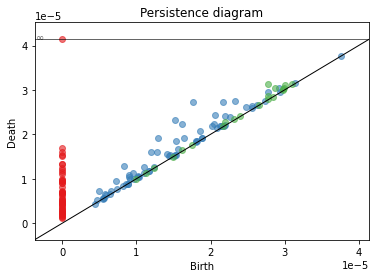

In [33]:
gd.plot_persistence_diagram(dgmX)